# 사용한 라이브러리

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 이미지 3장을 동시에 보여주는 함수

In [2]:
def img_plot(img1, img2, img3):
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 3, 1)
    plt.title('happy')
    plt.axis('off')
    plt.imshow(img1)

    plt.subplot(1, 3, 2)
    plt.title('joy')
    plt.axis('off')
    plt.imshow(img2)

    plt.subplot(1, 3, 3)
    plt.title('amusement')
    plt.axis('off')
    plt.imshow(img3)

    plt.show()

# 사용할 이미지
joy, happy, amusement 
(픽사베이에서 각각 'joy', 'happy', 'amusement'를 검색했을 때 나오는 이미지를 다운로드 받아 사용함)

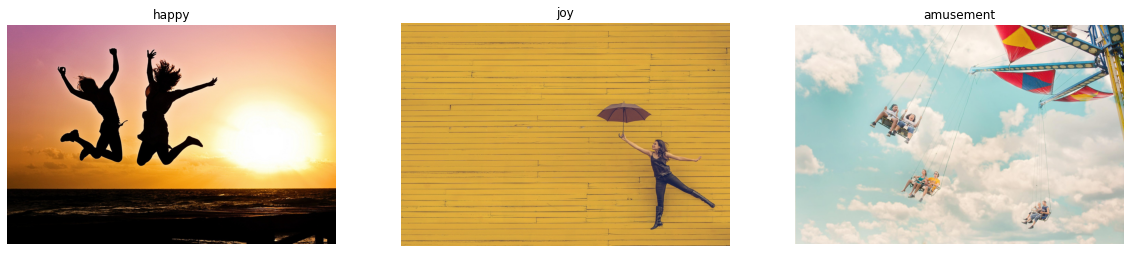

In [3]:
happy = cv2.imread('happy.jpg', cv2.IMREAD_COLOR)
joy = cv2.imread('joy.jpg', cv2.IMREAD_COLOR)
amusement = cv2.imread('amusement.jpg', cv2.IMREAD_COLOR)

happy = cv2.cvtColor(happy, cv2.COLOR_BGR2RGB)
joy = cv2.cvtColor(joy, cv2.COLOR_BGR2RGB)
amusement = cv2.cvtColor(amusement, cv2.COLOR_BGR2RGB)


img_plot(happy, joy, amusement)

# 각 이미지의 크기

In [4]:
print(happy.shape)
print(joy.shape)
print(amusement.shape)

(1280, 1920, 3)
(1305, 1920, 3)
(1280, 1920, 3)


# 이미지 크기 줄이기(연산 속도를 높이기 위해)

In [5]:
happy_resize = cv2.resize(happy, dsize = (500, 500), interpolation = cv2.INTER_AREA)
joy_resize = cv2.resize(joy, dsize = (500, 500), interpolation = cv2.INTER_AREA)
amusement_resize = cv2.resize(amusement, dsize = (500, 500), interpolation = cv2.INTER_AREA)
print(happy_resize.shape)
print(joy_resize.shape)
print(amusement_resize.shape)

(500, 500, 3)
(500, 500, 3)
(500, 500, 3)


# 3장의 이미지를 하나의 배열로 합치기
## k-means()에 입력으로 사용하기 위해

In [6]:
img = np.concatenate((happy_resize, joy_resize, amusement_resize))
img.shape

(1500, 500, 3)

# 이미지 2차원으로 만들기

In [7]:
img = img.reshape(-1, 3)
img.shape

(750000, 3)

# K-means 실행

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)

ret, label, center = cv2.kmeans(img.astype(np.float32), 12, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 모델의 중심값

In [9]:
center = center.astype('uint32')
print(center)

[[247 240 226]
 [216 165  61]
 [ 10   5   3]
 [221 215 203]
 [182 125  55]
 [247 203 163]
 [172 205 201]
 [205  39  56]
 [ 71  86  98]
 [121  75  34]
 [202 140 140]
 [247 193 112]]


# 감정 분류 시 사용할 색깔의 RGB 값 array

In [10]:
black = np.array([0, 0, 0])
white = np.array([255, 255, 255])
red = np.array([255, 0, 0])
blue = np.array([0, 0, 255])
yellow = np.array([255 ,255 ,0])
gray = np.array([128, 128, 128])
green = np.array([0, 128, 0])
purple = np.array([128, 0, 128])
orange = np.array([255, 165, 0])
turquoise = np.array([64, 224, 208])
brown = np.array([165, 42,42])
pink = np.array([255, 192, 203])

color = np.array([black, white, red, blue, yellow, gray, green, purple, orange, turquoise, brown, pink])
print(color)

[[  0   0   0]
 [255 255 255]
 [255   0   0]
 [  0   0 255]
 [255 255   0]
 [128 128 128]
 [  0 128   0]
 [128   0 128]
 [255 165   0]
 [ 64 224 208]
 [165  42  42]
 [255 192 203]]


## 색깔의 RGB값과 kmeans의 군집 중심과의 차이를 비교하여 각 군집을 색깔에 매칭하기

In [11]:
rgb_cluster = np.array([]).astype('uint8')
for i in np.arange(12):
    rgb_cluster = np.append(rgb_cluster, np.argmin(np.abs(np.mean((center[i] - color), axis = 1))))

#center[0]에 해당하는 color은 1(white)
print(rgb_cluster)

[ 1  8  0 11  5 11  4  7  2 10  9  4]


# 매칭된 군집에 속하는 픽셀 개수가 몇 개인지 계산

In [12]:
num = np.zeros(12).astype('uint32')

for i in np.arange(img.shape[0]):
    if(label[i] == 0):
        num[0] += 1
    elif(label[i] == 1):
        num[1]+= 1
    elif(label[i] == 2):
        num[2]+= 1
    elif(label[i] == 3):
        num[3]+= 1
    elif(label[i] == 4):
        num[4]+= 1
    elif(label[i] == 5):
        num[5]+= 1
    elif(label[i] == 6):
        num[6]+= 1
    elif(label[i] == 7):
        num[7]+= 1
    elif(label[i] == 8):
        num[8]+= 1
    elif(label[i] == 9):
        num[9]+= 1
    elif(label[i] == 10):
        num[10]+= 1
    elif(label[i] == 11):
        num[11]+= 1


sum = 0
print("각 군집에 포함되는 샘플 개수")
for i in np.arange(12):
    print("num " , i , ":", num[i])
    sum += num[i]

print("\n합이 img의 길이와 같은지 확인")
print("img length: " , img.shape[0])
print("sum length: ", sum)

각 군집에 포함되는 샘플 개수
num  0 : 57922
num  1 : 226949
num  2 : 78463
num  3 : 95758
num  4 : 46696
num  5 : 51245
num  6 : 93417
num  7 : 4429
num  8 : 12025
num  9 : 20438
num  10 : 40453
num  11 : 22205

합이 img의 길이와 같은지 확인
img length:  750000
sum length:  750000


# 각 색깔에 해당되는 픽셀 개수 계산
color_num은 순서대로 black, white, red, blue, yellow, gray, green, purple, orange, turquoise, brown, pink이다.

In [13]:
color_num = np.zeros(12).astype('uint32')

for i in np.arange(12):
    for j in np.arange(12):
        if(rgb_cluster[j] == i):
            color_num[i] += num[j]

print(np.sum(color_num))
print(np.sum(num))
print(color_num)

750000
750000
[ 78463  57922  12025      0 115622  46696      0   4429 226949  40453
  20438 147003]


# 각 색깔에 해당되는 픽셀 개수를 백분율로 변환

In [14]:
percentage = {"black" : 0,
                 "white" : 0,
                 "red" : 0,
                 "blue": 0,
                 "yellow": 0,
                 "gray": 0,
                 "green": 0,
                 "purple" : 0,
                 "orange": 0,
                 "turquoise" : 0,
                 "brown": 0,
                 "pink": 0}

color_list = ["black", "white", "red", "blue", "yellow", "gray", "green", "purple", "orange", "turquoise", "brown", "pink"]

percentage_  = ((color_num/img.shape[0])*100)

for i, j in zip(color_list, np.arange(12)):
    percentage[i] = percentage_[j]
print(percentage)

sum_= 0
for i in color_list:
    sum_ += percentage[i]

print("\n",sum_)

{'black': 10.461733333333335, 'white': 7.722933333333333, 'red': 1.6033333333333333, 'blue': 0.0, 'yellow': 15.416266666666667, 'gray': 6.226133333333333, 'green': 0.0, 'purple': 0.5905333333333334, 'orange': 30.259866666666667, 'turquoise': 5.393733333333333, 'brown': 2.7250666666666667, 'pink': 19.6004}

 100.0


# 각 색깔이 갖는 감정의 비율

In [15]:
black_emotion = {"sadness" : 0.51,
                 "fear" : 0.48,
                 "hate": 0.41,
                 "anger": 0.32,
                 "guilt": 0.30}

white_emotion = {"relief": 0.43,
                 "contentment": 0.30}
red_emotion = {"love" : 0.68,
               "anger": 0.51,
               "pleasure": 0.33,
               "hate": 0.29}
blue_emotion = {"relief": 0.35,
                "contentment": 0.34,
                "interest": 0.27}
yellow_emotion = {"joy": 0.52,
                  "amusement": 0.40,
                  "pleasure": 0.33}
gray_emotion = {"sadness": 0.48,
                "disappointment": 0.41,
                "regret": 0.31}
green_emotion = {"contentment": 0.39,
                 "joy": 0.34,
                 "pleasure": 0.34,
                 "relief": 0.33,
                 "interest": 0.31}
purple_emotion = {"pleasure": 0.25,
                  "interest": 0.24,
                  "pride": 0.24,
                  "admiration": 0.24}
orange_emotion = {"joy": 0.44,
                  "amusement": 0.42,
                  "pleasure": 0.33}
turquoise_emotion = {"please": 0.35,
                     "relief": 0.34,
                     "joy": 0.32,
                     "contentmemt": 0.31}
brown_emotion = {"disgust": 0.36}
pink_emotion = {"love": 0.50,
                "joy": 0.41,
                "pleasure": 0.40,
                "amusement": 0.36}

In [16]:
color_emotion = {"black" : black_emotion,
                 "white" : white_emotion,
                 "red" : red_emotion,
                 "blue": blue_emotion,
                 "yellow": yellow_emotion,
                 "gray": gray_emotion,
                 "green": green_emotion,
                 "purple" : purple_emotion,
                 "orange": orange_emotion,
                 "turquoise" : turquoise_emotion,
                 "brown": brown_emotion,
                 "pink": pink_emotion
                 }

In [17]:
color_emotion['black']

{'anger': 0.32, 'fear': 0.48, 'guilt': 0.3, 'hate': 0.41, 'sadness': 0.51}

# 감정 딕셔너리
love, anger, pleasure, hate, joy, amusement, contentment, relief, interest, pride,admiration,sadness,disappointment,regret,disgust,fear,guilt

In [18]:
emotion = {"love": 0,
           "anger": 0,
           "pleasure": 0,
           "hate":0,
           "joy": 0,
           "amusement": 0,
           "contentment": 0,
           "relief": 0,
           "interest": 0,
           "interest": 0,
           "pride": 0,
           "admiration": 0,
           "sadness": 0,
           "disappointment": 0,
           "regret": 0,
           "disgust": 0,
           "fear": 0,
           "guilt": 0}

emotion_list = ["love", "anger", "pleasure", "hate", "joy", "amusement", "contentment", "relief", "interest", "pride", "admiration", "sadness", "disappointment", "regret", "disgust", "fear", "guilt"]

In [19]:
color_emotion

{'black': {'anger': 0.32,
  'fear': 0.48,
  'guilt': 0.3,
  'hate': 0.41,
  'sadness': 0.51},
 'blue': {'contentment': 0.34, 'interest': 0.27, 'relief': 0.35},
 'brown': {'disgust': 0.36},
 'gray': {'disappointment': 0.41, 'regret': 0.31, 'sadness': 0.48},
 'green': {'contentment': 0.39,
  'interest': 0.31,
  'joy': 0.34,
  'pleasure': 0.34,
  'relief': 0.33},
 'orange': {'amusement': 0.42, 'joy': 0.44, 'pleasure': 0.33},
 'pink': {'amusement': 0.36, 'joy': 0.41, 'love': 0.5, 'pleasure': 0.4},
 'purple': {'admiration': 0.24,
  'interest': 0.24,
  'pleasure': 0.25,
  'pride': 0.24},
 'red': {'anger': 0.51, 'hate': 0.29, 'love': 0.68, 'pleasure': 0.33},
 'turquoise': {'contentmemt': 0.31,
  'joy': 0.32,
  'please': 0.35,
  'relief': 0.34},
 'white': {'contentment': 0.3, 'relief': 0.43},
 'yellow': {'amusement': 0.4, 'joy': 0.52, 'pleasure': 0.33}}

# 각 감정이 갖는 값 계산

In [20]:
emotion["love"] = color_emotion['red']['love']  * percentage['red'] + color_emotion['pink']['love'] * percentage['pink']

emotion["anger"] =  color_emotion['black']['anger']  * percentage['black'] + color_emotion['red']['anger'] * percentage['red']

emotion["pleasure"] = color_emotion['green']['pleasure'] * percentage['green'] + color_emotion['orange']['pleasure'] * percentage['orange'] + color_emotion['pink']['pleasure'] * percentage['pink'] + color_emotion['purple']['pleasure'] * percentage['purple'] + color_emotion['red']['pleasure'] * percentage['red'] + color_emotion['yellow']['pleasure'] * percentage['yellow']

emotion["hate"] = color_emotion['black']['hate'] * percentage['black'] + color_emotion['red']['hate'] * percentage['red'] 

emotion["joy"]  =  color_emotion['green']['joy'] * percentage['green'] +  color_emotion['orange']['joy'] * percentage['orange']  +  color_emotion['pink']['joy'] * percentage['pink'] +  color_emotion['turquoise']['joy'] * percentage['turquoise'] +  color_emotion['yellow']['joy'] * percentage['yellow'] 

emotion["amusement"] = color_emotion['orange']['amusement'] * percentage['orange'] + color_emotion['pink']['amusement'] * percentage['pink'] + color_emotion['yellow']['amusement'] * percentage['yellow']

emotion["contentment"] = color_emotion['blue']['contentment'] * percentage['blue'] + color_emotion['green']['contentment'] * percentage['green'] + color_emotion['white']['contentment'] * percentage['white']

emotion["relief"] = color_emotion['blue']['relief'] * percentage['blue'] + color_emotion['green']['relief'] * percentage['green'] + color_emotion['turquoise']['relief'] * percentage['turquoise'] + color_emotion['white']['relief'] * percentage['white']

emotion["interest"] = color_emotion['blue']['interest'] * percentage['blue'] + color_emotion['green']['interest'] * percentage['green'] + color_emotion['purple']['interest'] * percentage['purple']

emotion["pride"] = color_emotion['purple']['pride'] * percentage['purple']

emotion["admiration"] = color_emotion['purple']['admiration'] * percentage['purple']

emotion["sadness"] = color_emotion['black']['sadness'] * percentage['black'] + color_emotion['gray']['sadness'] * percentage['gray']

emotion["disappointment"] = color_emotion['gray']['disappointment'] * percentage['gray']

emotion["regret"] = color_emotion['gray']['regret'] * percentage['gray']

emotion["disgust"] = color_emotion['brown']['disgust'] * percentage['brown']

emotion["fear"] =  color_emotion['black']['fear'] * percentage['black']

emotion["guilt"] = color_emotion['black']['guilt'] * percentage['black']

# 주 감정 추출

In [ ]:
first_emotion = ""
second_emotion = ""
first_percentage = 0.0
second_percentage = 0.0
for emo in emotion_list:
    if(emotion[emo] > first_percentage):
        second_percentage = first_percentage
        second_emotion = first_emotion
        first_percentage = emotion[emo]
        first_emotion =emo

print(first_emotion, ": ", first_percentage)
print(second_emotion, ": ", second_percentage)

joy :  31.09295866666666
pleasure :  23.590017333333336
